In [1]:
%matplotlib widget

Trying to replicate the following research piece:
https://www.federalreserve.gov/econres/notes/feds-notes/index-of-common-inflation-expectations-20200902.htm
Essentially to create an indicator of inflation expectations that reads through the noise of various forward looking metrics.

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
#from fredapi import Fred as FredApi
#fred = FredApi(api_key='0dfcbb403eea7fee006f01e935be9216')

#### University of Michigan data
Probably the easiest solution is to download data in csv format from the university of Michigan data area located at:
https://data.sca.isr.umich.edu/data-archive/mine.php
selecting tables related to "Expected changes in prices in the next..." and read from the CSVs.
You can also get selected data (not all) directly from the Fred archive.
Once you've got those, you have 4 of the 21 series proposed by the article as they use:
* short term mean
* medium term mean
* medium term 25 and 75 percentiles

But I am going to use 6 of these, same across the 2 horizons.

In [3]:
# mich_short_fred = fred.get_series_latest_release('MICH')
mich_short = pd.read_csv("sca_table_32.csv", header=1, skiprows=0)
mich_medium = pd.read_csv("sca_table_33.csv", header=1, skiprows=0)

In [4]:
mich_short.head(2)

,Month,Year,Down,Same,Up by 1-2%,Up by 3-4%,Up by 5%,Up by 6-9%,Up by 10-14%,Up by 15%+,Up; DK how much,DK; NA,Mean,Variance,Standard Deviation,25th Percentile,Median,75th Percentile,Interquartile Range (75th-25th),Unnamed: 19
0,1,1978,2,13,8,11,15,17,10,3,21,0,6.1,31,5.6,3.0,5.2,7.8,4.8,NaN
1,2,1978,1,11,6,9,14,16,11,10,19,3,8.5,72,8.5,4.1,6.4,10.0,5.9,NaN


In [5]:
mich_short.tail(2)

,Month,Year,Down,Same,Up by 1-2%,Up by 3-4%,Up by 5%,Up by 6-9%,Up by 10-14%,Up by 15%+,Up; DK how much,DK; NA,Mean,Variance,Standard Deviation,25th Percentile,Median,75th Percentile,Interquartile Range (75th-25th),Unnamed: 19
537,10,2022,7,12,8,13,15,11,13,16,4,1,7.3,92,9.6,1.9,5.0,9.9,8.1,NaN
538,11,2022,8,13,7,15,15,13,11,15,3,0,7.3,111,10.6,1.9,4.9,9.7,7.8,NaN


Now that you have checked where the stuff comes from and what the dates are, you can create an index in pandas and assign it.

In [6]:
mich_short['Day'] = 1
mich_medium['Day'] = 1
mich_short['Date'] = pd.to_datetime(mich_short[['Year','Month','Day']])
mich_medium['Date'] = pd.to_datetime(mich_medium[['Year','Month','Day']])
mich_short.set_index('Date', inplace=True)
mich_medium.set_index('Date', inplace=True)
mich_short = mich_short.drop(['Year','Month','Day','Unnamed: 19'], axis=1)
mich_medium = mich_medium.drop(['Year','Month','Day','Unnamed: 19'], axis=1)

In [7]:
mich_short.tail()

,Down,Same,Up by 1-2%,Up by 3-4%,Up by 5%,Up by 6-9%,Up by 10-14%,Up by 15%+,Up; DK how much,DK; NA,Mean,Variance,Standard Deviation,25th Percentile,Median,75th Percentile,Interquartile Range (75th-25th)
Date,,,,,,,,,,,,,,,,,
2022-07-01,5,10,7,15,17,13,13,16,3,1,8.2,112,10.6,2.7,5.2,10.0,7.3
2022-08-01,10,14,8,12,14,13,12,13,3,1,6.5,85,9.2,0.8,4.8,9.6,8.8
2022-09-01,9,15,9,13,16,9,10,15,3,1,6.4,93,9.6,0.6,4.7,9.6,9.0
2022-10-01,7,12,8,13,15,11,13,16,4,1,7.3,92,9.6,1.9,5.0,9.9,8.1
2022-11-01,8,13,7,15,15,13,11,15,3,0,7.3,111,10.6,1.9,4.9,9.7,7.8


In [8]:
mich_medium.tail()

,Down,Same,Up by 1-2%,Up by 3-4%,Up by 5%,Up by 6-9%,Up by 10-14%,Up by 15%+,Up; DK how much,DK; NA,Mean,Variance,Standard deviation,25th Percentile,Median,75th Percentile,Interquartile Range (75th-25th)
Date,,,,,,,,,,,,,,,,,
2022-07-01,18.0,8.0,15.0,22.0,14.0,7.0,5.0,4.0,3.0,4.0,3.4,46.0,6.7,0.3,2.9,5.0,4.7
2022-08-01,13.0,6.0,20.0,25.0,14.0,3.0,7.0,4.0,5.0,3.0,3.8,41.0,6.4,1.0,2.9,4.8,3.9
2022-09-01,14.0,8.0,22.0,20.0,11.0,4.0,8.0,5.0,4.0,4.0,3.5,37.0,6.1,0.6,2.7,5.0,4.4
2022-10-01,15.0,7.0,17.0,27.0,10.0,7.0,5.0,5.0,5.0,2.0,3.8,53.0,7.3,0.8,2.9,4.9,4.1
2022-11-01,14.0,8.0,17.0,26.0,11.0,6.0,7.0,5.0,4.0,2.0,4.0,54.0,7.3,0.8,3.0,5.1,4.2


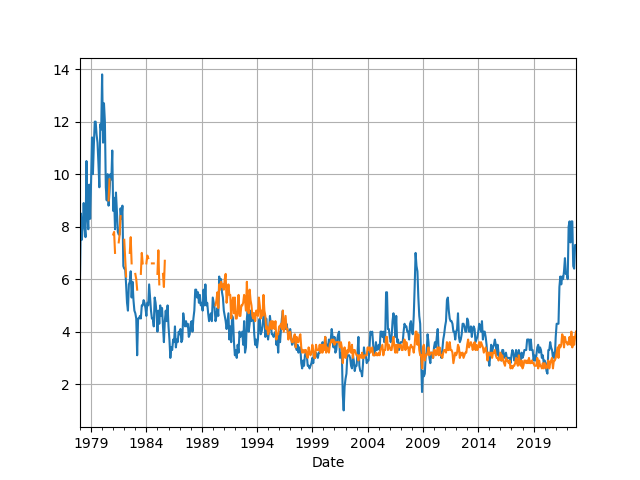

In [9]:
plt.figure()
ax = mich_short['Mean'].plot();
mich_medium['Mean'].plot();
ax.grid(True)

In [10]:
# now construct the core DataFrame of the Michigan data and store it in a pickle
columns = ["mich_short_mean","mich_short_25","mich_short_75","mich_medium_mean","mich_medium_25","mich_medium_75"]
michigan_dataset = pd.DataFrame(columns=columns, index=mich_short.index)
michigan_dataset[["mich_short_mean","mich_short_25","mich_short_75"]] = mich_short[["Mean","25th Percentile","75th Percentile"]].to_numpy()
michigan_dataset[["mich_medium_mean","mich_medium_25","mich_medium_75"]] = mich_medium[["Mean","25th Percentile","75th Percentile"]].to_numpy()
michigan_dataset = michigan_dataset.resample('M').last().dropna()
michigan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 434 entries, 1979-02-28 to 2022-11-30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mich_short_mean   434 non-null    float64
 1   mich_short_25     434 non-null    float64
 2   mich_short_75     434 non-null    float64
 3   mich_medium_mean  434 non-null    float64
 4   mich_medium_25    434 non-null    float64
 5   mich_medium_75    434 non-null    float64
dtypes: float64(6)
memory usage: 23.7 KB


In [11]:
michigan_dataset.tail()

,mich_short_mean,mich_short_25,mich_short_75,mich_medium_mean,mich_medium_25,mich_medium_75
Date,,,,,,
2022-07-31,8.2,2.7,10.0,3.4,0.3,5.0
2022-08-31,6.5,0.8,9.6,3.8,1.0,4.8
2022-09-30,6.4,0.6,9.6,3.5,0.6,5.0
2022-10-31,7.3,1.9,9.9,3.8,0.8,4.9
2022-11-30,7.3,1.9,9.7,4.0,0.8,5.1


In [12]:
michigan_dataset.to_pickle('michigan_dataset.pd.pkl')